# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
# импортируем необходимые библиотеки 
import pandas as pd
import numpy as np
import scipy.stats as st

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt


In [2]:
# выгружаем данные по трем регионам
data_1= pd.read_csv('/datasets/geo_data_0.csv')
data_2= pd.read_csv('/datasets/geo_data_1.csv')
data_3= pd.read_csv('/datasets/geo_data_2.csv')

data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Общая информация: (100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Название столбцов: ['id', 'f0', 'f1', 'f2', 'product']
Информация о пропусках:


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Полных дубликатов: 0
Распределение данных по признакам


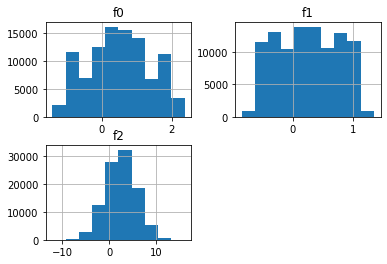

In [3]:
#Общая информация по данным региона 1

print(f'Общая информация: {data_1.shape}') 

print(data_1.info())

print(30*'=')

print(f'Название столбцов: {list(data_1.columns)}')

print(30*'=')

#Пропуски

print('Информация о пропусках:')

display(data_1.isnull().sum())

print(30*'=')

#Полные дубликаты 

print(f'Полных дубликатов: {data_1.duplicated().sum()}')
                            
print(30*'=')

print('Распределение данных по признакам')

data_1[["f0","f1","f2"]].hist()
plt.show()


Общая информация: (100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Название столбцов датафрейма:
Название столбцов: ['id', 'f0', 'f1', 'f2', 'product']
Информация о пропусках:


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Полных дубликатов: 0
Распределение данных по признакам


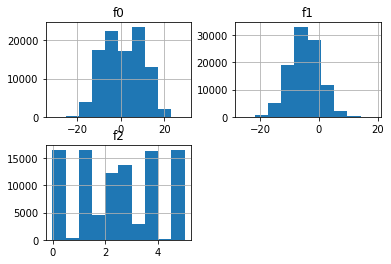

In [4]:
#Общая информация по данным региона 2

print(f'Общая информация: {data_2.shape}') 

print(data_2.info())

print(30*'=')

print('Название столбцов датафрейма:')

print(f'Название столбцов: {list(data_2.columns)}')

print(30*'=')

#Пропуски

print('Информация о пропусках:')

display(data_2.isnull().sum())

print(30*'=')

#Полные дубликаты 

print(f'Полных дубликатов: {data_2.duplicated().sum()}')
                            
print(30*'=')

print('Распределение данных по признакам')

data_2[["f0","f1","f2"]].hist()
plt.show()

Общая информация: (100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Название столбцов датафрейма:
Название столбцов: ['id', 'f0', 'f1', 'f2', 'product']
Информация о пропусках:


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Полных дубликатов: 0
Распределение данных по признакам


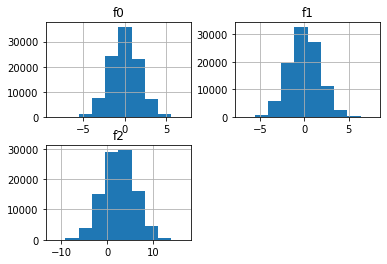

In [5]:
#Общая информация по данным региона 3

print(f'Общая информация: {data_3.shape}') 
print(data_1.info())

print(30*'=')

print('Название столбцов датафрейма:')

print(f'Название столбцов: {list(data_3.columns)}')

print(30*'=')

#Пропуски

print('Информация о пропусках:')

display(data_3.isnull().sum())

print(30*'=')

#Полные дубликаты 

print(f'Полных дубликатов: {data_3.duplicated().sum()}')
                            
print(30*'=')

print('Распределение данных по признакам')

data_3[["f0","f1","f2"]].hist()
plt.show()

Данные корректны, можно продолжать исследлвание  

## Обучаем и проверяем модели для каждого региона 

In [6]:
# удаляем лишние столбцы, разбиваем данные первого региона на обучающую и валидационную выборки 
features = data_1.drop(["product","id"], axis=1)
target = data_1["product"]
features_train, features_valid, target_train, target_valid_1 = train_test_split(features, target, test_size=0.25, random_state=1)

# масштабируем данные
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
features_valid = scaler.transform(features_valid)
    
# обучаем модель и находим точность предсказаний на валидационной выборке 
model = LinearRegression(normalize=False)
model.fit(features_train, target_train)
predictions_1 = model.predict(features_valid)
predictions_1 = pd.Series(predictions_1)

#  находим среднеквадратичную ошибку и средний объем добычи 
rmse_1 = (mean_squared_error(predictions_1, target_valid_1))**(0.5)
average_product_1 = sum(predictions_1) / len(predictions_1)
    
print("RMSE_1: ", rmse_1)
print("Average product_1: ", average_product_1)

RMSE_1:  37.74258669996437
Average product_1:  92.49262459838843


In [8]:
# удаляем лишние столбцы, разбиваем данные второго региона на обучающую и валидационную выборки 
features = data_2.drop(["product","id"], axis=1)
target = data_2["product"]
features_train, features_valid, target_train, target_valid_2 = train_test_split(features, target, test_size=0.25, random_state=1)

# масштабируем данные 
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
features_valid = scaler.transform(features_valid)
    
# обучаем модель находим точность предсказаний на валидационной выборке
model = LinearRegression(normalize=False)
model.fit(features_train, target_train)
predictions_2 = model.predict(features_valid)
predictions_2 = pd.Series(predictions_2)

#  находим среднеквадратичную ошибку и средний объем добычи 
rmse_2 = (mean_squared_error(predictions_2, target_valid_2))**(0.5)
average_product_2 = sum(predictions_2) / len(predictions_2)
    
print("RMSE_2: ", rmse_2)
print("Average product_2: ", average_product_2)


RMSE_2:  0.8943375629130574
Average product_2:  69.1204052428558


In [9]:
# удаляем лишние столбцы, разбиваем данные второго региона на обучающую и валидационную выборки 
features = data_3.drop(["product","id"], axis=1)
target = data_3["product"]
features_train, features_valid, target_train, target_valid_3 = train_test_split(features, target, test_size=0.25, random_state=1)

# масштабируем данные 
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
features_valid = scaler.transform(features_valid)
    
# обучаем модель находим точность предсказаний на валидационной выборке
model = LinearRegression(normalize=False)
model.fit(features_train, target_train)
predictions_3 = model.predict(features_valid)
predictions_3 = pd.Series(predictions_3)

#  находим среднеквадратичную ошибку и средний объем добычи 
rmse_3 = (mean_squared_error(predictions_3, target_valid_3))**(0.5)
average_product_3 = sum(predictions_3) / len(predictions_3)
    
print("RMSE_3: ", rmse_3)
print("Average product_3: ", average_product_3)

RMSE_3:  39.86671127773423
Average product_3:  94.95683048585317


- Посмотрим на степень влияния факторов (корреляцию) f1,f2,f3 на общую производительность по добыче региона в разрезе моделей

In [10]:
data_multi_cor = data_1
print(data_multi_cor.corr())
#pd.plotting.scatter_matrix(data_multi_cor, figsize=(9,9))
#plt.show()

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


In [11]:
data_multi_cor = data_2
print(data_multi_cor.corr())

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000


In [12]:
data_multi_cor = data_3
print(data_multi_cor.corr())

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


Исследование показало, что добыча выше у первого и третьего региона, при схожем высоком уровне значения среднеквадратичной ошибки. Производительность второго региона ниже, но ошибка модели выглядит незначительной, что указывает на возможно более точные предсказания модели и следовательно привлекательность региона. Также во второй модели прослеживается высокая степень зависимости влияния фактора f2 на целевой признак (product), как следствие низкая среднеквадратичная ошибка и высокая оценка работы модели в целом.

## Подготовка к расчету прибыли 

In [13]:
# расчет точки безубыточности и необходимого среднего обьема нефти в одной скважине 
BUDJET = 10**10
INCOME = 450000

#budjet - income*x = 0 
x= (BUDJET/INCOME)
y= round(x,0)

print("Точка безубыточности для добычи, тыс. баррелей: ", y)
print("Средний объем нефти в одной скважине для безубыточного функционирования, тыс. баррелей:", (y/200))

Точка безубыточности для добычи, тыс. баррелей:  22222.0
Средний объем нефти в одной скважине для безубыточного функционирования, тыс. баррелей: 111.11


Вывод: средний объем запасов в скважинах по всем регионам ниже, чем объем необходимый для выхода в область безубыточной разработки  

## Расчет прибыли и рисков

In [14]:
# функция возвращает прогноз рентабельности 200 лучших скважин месторождения 
def profit(predictions, target):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:200]
    return (INCOME * selected.sum()) - BUDJET

# функция считает выручку 500 скважин из 1000 по месторождениям 
def bootstrap(predictions, target):
    state = np.random.RandomState(12345)   
    values = []
    target_test = target.reset_index(drop=True)
    predict = pd.Series(predictions)
    for i in range(1000):
        target_subsample = target_test.sample(500, replace=True, random_state=state) 
        predictions_subsample = predict.loc[target_subsample.index.to_list()]
        values.append (profit(predictions_subsample, target_subsample))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    higher = values.quantile(0.975)

    mean = values.mean()
    
    print("Средняя выручка:", mean)
    print("2.5%-квантиль:", lower)
    print("97.5%-квантиль:", higher)

    values_loss = [res for res in values if res < 0]
    risk = len(values_loss)/len(values)
    percentage_risk = "{:.0%}".format(risk)
    print("Риск убытков:", percentage_risk)

In [15]:
# результаты по первому месторождению 
bootstrap(predictions_1, target_valid_1)

Средняя выручка: 458100401.7997511
2.5%-квантиль: -91938453.32589239
97.5%-квантиль: 1015824888.6825125
Риск убытков: 5%


In [16]:
# результаты по второму месторождению
bootstrap(predictions_2, target_valid_2)

Средняя выручка: 533609292.92167586
2.5%-квантиль: 98001407.23450962
97.5%-квантиль: 966461912.599809
Риск убытков: 0%


In [17]:
# результаты по третьему месторождению
bootstrap(predictions_3, target_valid_3)

Средняя выручка: 426348386.1666254
2.5%-квантиль: -116622627.7963096
97.5%-квантиль: 980501749.734359
Риск убытков: 6%


Вывод: Мы изучили данные по трем месторождениям, проверили наличие дубликатов, пропусков - оценили распределение. Далее были построены модели линейной регрессии, для каждого месторожденя был посчитан средний объем добычи, а также показатель среднеквадратичной ошибки RMSE . С помощью техники Bootstrap был рассчитан 95% доверительный интервал для среднего обьема нефти, а также был оценен риск получения убытков при разработке каждого из месторождений. По итогам исследования второе месторождения выглядит ниаболее преспективным - поскольку средняя прибыль выше чем у остальных, а риск получения убытков в процентном отношении ниже.   

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x ]  Весь код выполняется без ошибок
- [x ]  Ячейки с кодом расположены в порядке исполнения
- [x ]  Выполнен шаг 1: данные подготовлены
- [x ]  Выполнен шаг 2: модели обучены и проверены
    - [x ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x ]  Модели обучены, предсказания сделаны
    - [x ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x ]  На экране напечатаны результаты
    - [x ]  Сделаны выводы
- [x ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x ]  Для всех ключевых значений созданы константы Python
    - [x ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x ]  По предыдущему пункту сделаны выводы
    - [x ]  Написана функция расчёта прибыли
- [x ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x ]  Проведена процедура *Bootstrap*
    - [x ]  Все параметры бутстрепа соответствуют условию
    - [x ]  Найдены все нужные величины
    - [x ]  Предложен регион для разработки месторождения
    - [x ]  Выбор региона обоснован